<img src="support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20-21, 2016</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Matplotlib</h1></center>

<p>
**`matplotlib`** is a plotting library for Python.
<p>
**Pros:**
<ul> 
<li>Huge amount of functionality/options.
<li>Works with numpy arrays and python lists.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples (with code) at http://matplotlib.org/gallery.
<li>Shares many syntactic conventions with Matlab.
</ul>

<p>
**Cons:**
<ul>
<li>Slow for rapidly updating plots.
<li>3D plotting support is not great.
<li>Documentation is not always useful.
<li>Essentially has two interfaces.  One is intended to be close to Matlab, the other is object oriented.  You will find examples that assume one or the other, but rarely the one you are after.
<li>Shares many syntactic conventions with Matlab.
</ul>
</div>

In [1]:
# Import numpy and pyplot 
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<left><h1>Enable Inline Plotting</h1></left>
<p>One of the great features of the Jupyter Notebook is the ability to have your code, outputs, and graphics in a single document. But plots do not render in the notebook by default. To turn on inline plot rendering, we have to use a so-called ```Magic Command```, which is a special Jupyter command preceded by a %.

<p>Two commonly used Matplotlib magic commands are:
<ul>
<li>```%matplotlib notebook``` - creates interactive plots. This is what we're going to use today. Interactive features depend on the kernel running in the background, which means they disappear without the kernel. This feature is somewhat new, so still has occasional bugs.
<li>```%matplotlib inline``` - creates static (non-interactive) plots. This still remains the most common way to generate plots.
</ul>
<p>It's important to note that the above commands are specific to Jupyter. In other environments, you'll need to add a line of code to explicitly display your plots, or save them to disk.  This will be discussed further when we cover other environments. 

</div>

In [2]:
%matplotlib notebook
# %matplotlib inline
# Feel free to replace the command above and see how the behavior of the notebook changes

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Example 1. Simple plot</h2>

<p> start by making some sample data
</div>



In [3]:
x = np.arange(0, 10, 0.01) #make evenly spaced points between 0 and 10 at intervals of 0.01
y = np.sin(2*np.pi*x)*np.exp(-0.5*x) #some function x
print("first five elements of x:",x[:5])
print("first five elements of y:",y[:5])

first five elements of x: [0.   0.01 0.02 0.03 0.04]
first five elements of y: [0.         0.06247735 0.12408615 0.18459157 0.2437655 ]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> Create a figure and axis, the plot our data on the axis
</div>

<IPython.core.display.Javascript object>


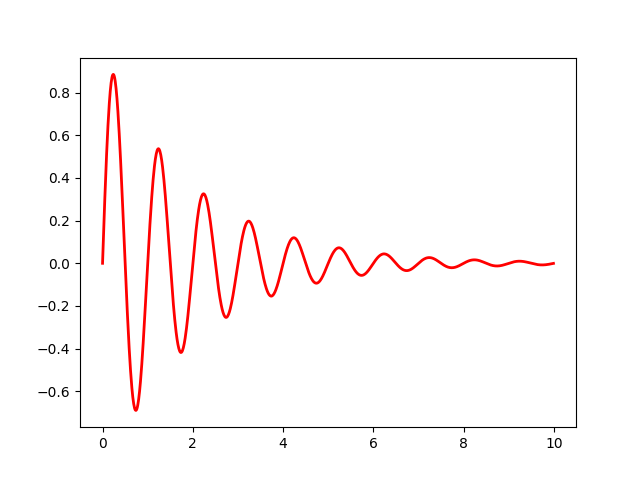

In [4]:
fig,ax = plt.subplots() #subplots will make a single axis inside a new figure by default
ax.plot(x, y, color='red', linewidth=2) 

# The figure can be saved by uncommenting the line below
# All major image formats (as well as PDFs) are accepted formats.
# fig.savefig('/testfig.png')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Example 2. Subplots</h2> 

<p>A given figure can have more than one axis. The ```subplot``` command, which we used above, generates a single axis by default. But we can specify the number of axes that we want.

</div>

<IPython.core.display.Javascript object>


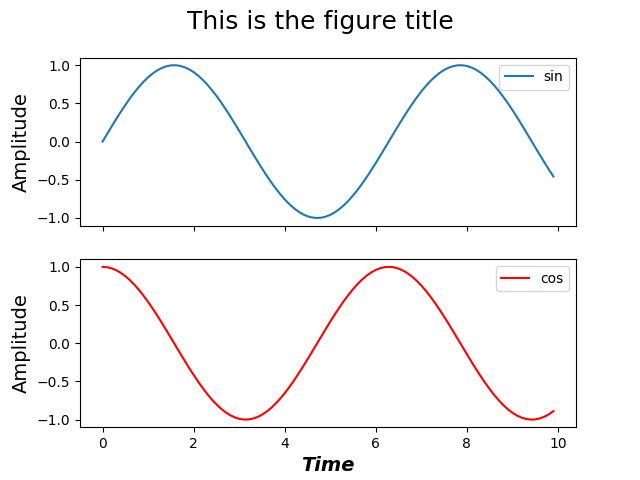

axes type: <class 'numpy.ndarray'>
axes shape: (2,)
axes object:


In [5]:
#make a time array
t = np.arange(0, 10, 0.1)

# Create figure and axes objects. Make them share the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

# Here, `axes` is a numpy array with two axes subplot objects
print('axes type: ' + str(type(axes)))
print('axes shape:', np.shape(axes))
print('axes object:\n' + str(axes))

# Plot on each subplot by indexing into 'ax'
axes[0].plot(t, np.sin(t), label='sin')
axes[1].plot(t, np.cos(t), label='cos', color='red')

# We can loop over the `axes` array to set properties in every subplot (no matter how many)
for ax in axes:
    ax.legend(loc='best')
    ax.set_ylabel('Amplitude',fontsize=14)
    
# We can also access individual axes to set the properties
axes[1].set_xlabel('Time',fontsize=14,weight='bold',style='italic')

# We can also edit attributes of the entire figure, such as the title
fig.suptitle('This is the figure title',fontsize=18);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Note that the x-axes are tied together in interactive mode due to the 'sharex = True' flag. Try setting that to False and regenerating

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.1:**

<ol>
<li>Remake the above plot with 4 subplots (2 rows, 2 columns; hint: you'll now have to index into axes like **`axes[0, 0]`**).
<li>Create a loop over all the axes objects (hint: use **`axes.flatten()`**) so that the **`legend`** and **`set_ylabel`** functions are called for all subplots.
<li>Use the loop from #2 to add a title to only the top row of plots using the **`set_title`** function.
<li>Look at the documentation for the fig.tight_layout() command to optimize figure layout 
  * Note that this doesn't play nice with the figure suptitle. try using the 'plt.subplots_adjust(top=0.92)' command to control the whitespace at the top of the plot.
</ol>
  
</div>

In [9]:
?axes.flatten
print(type(axes)
     )

<class 'numpy.ndarray'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Example 3. Plotting histograms </h2> 
<p> Use the ```hist``` command.
</div>

<IPython.core.display.Javascript object>


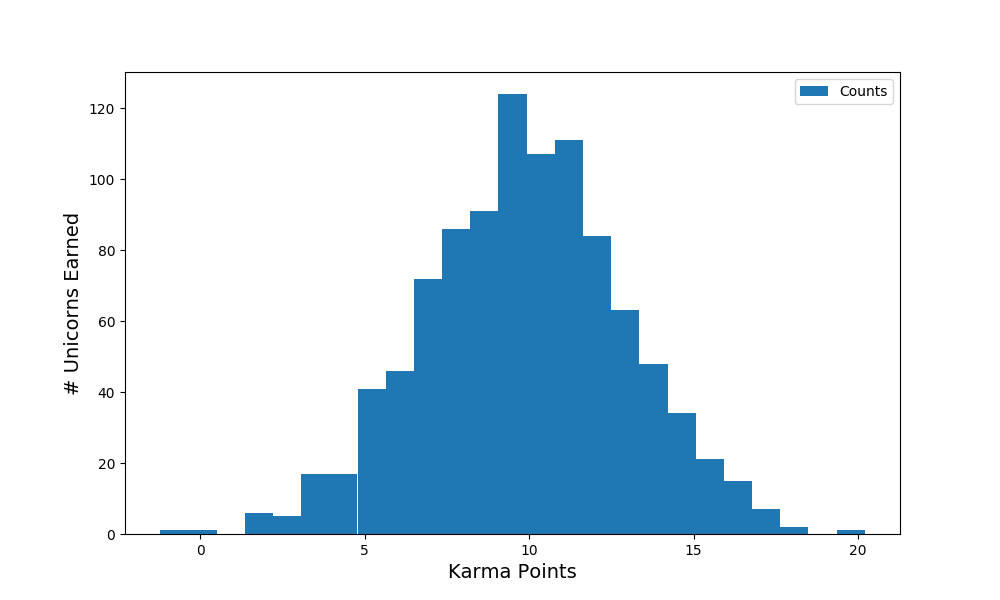

In [10]:
# Create gaussian distributed data with mu=10, sigma=3
x = 10 + 3 * np.random.randn(1000)

# Create figure and axes object
fig, ax = plt.subplots(1,1,figsize=(10,6))

# Create histogram
bins=25
ax.hist(x, bins=bins, label='Counts')

# Set other properties
ax.set_ylabel('# Unicorns Earned', fontsize=14)
ax.set_xlabel('Karma Points', fontsize=14)
ax.legend(loc='upper right')


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.2:**

<p>Bin edges can be explicitly defined. 
<p> For example, you can use linspace to define bin edges:
<p>&nbsp;&nbsp;&nbsp;&nbsp;```bins = np.linspace(5,25,num=50,endpoint=True)```

<p>Remake the histogram above but explicitly define the bin edges rather than the bin size.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Example 4 - Plotting Images</h2>
<p> The ```imshow``` and ```matshow``` functions are useful for displaying matrices
<p> Let's first grab an image that was saved on your hard drive using Matplotlib's ```image.mpimg``` function. This will turn the bitmapped image file into a Numpy array with dimensions ```HEIGHT x WIDTH x COLORS```
</div>

In [11]:
import matplotlib.image as mpimg

img=mpimg.imread('support_files/stinkbug.png')

print('the shape of img is: '+str(np.shape(img)))

the shape of img is: (375, 500, 3)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> Now create a new figure and axis, then use ```imshow``` to display the data
</div>

<IPython.core.display.Javascript object>


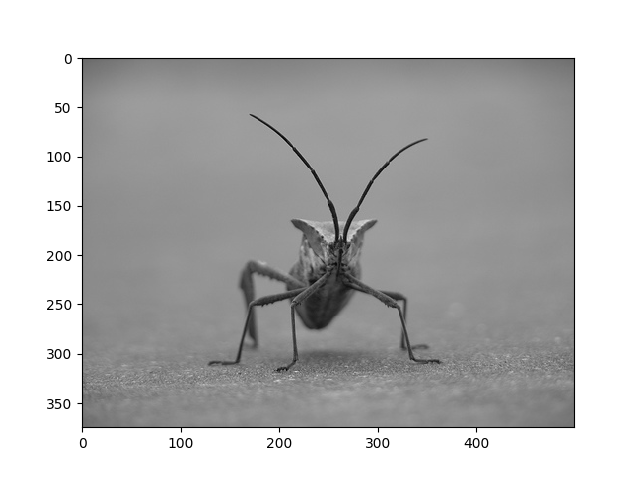

In [12]:
fig,ax=plt.subplots()
imgplot = ax.imshow(img)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Note that, despite this having data in three color channels, it renders as a grayscale image. Why is that?
<p> Let's look at all three color values for a given point on the image:
</div>

In [13]:
img[200,200,:]

array([0.59607846, 0.59607846, 0.59607846], dtype=float32)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.3:**

<p>Plot a single color channel

<ol>
<li>Use Numpy slicing commands that you learned in the previous module to extract all pixels for one of the three color channels
<li>Repeat the imshow command for that single color channel
<li>Note that, in the absence of color data, Matplotlib applies the 'jet' colormap by default. Try adding the following keyword argument to your imshow command:
<p>&nbsp;&nbsp;&nbsp;&nbsp;```cmap = 'gray'```
</ol>

</div>

<IPython.core.display.Javascript object>


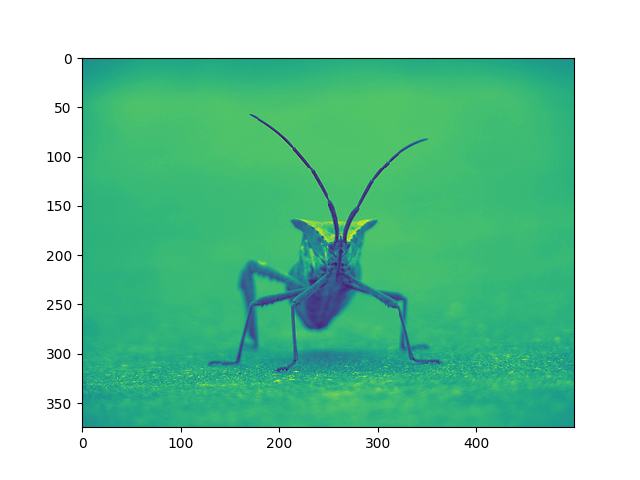

In [15]:
fig, ax  = plt.subplots()
imgplot = ax.imshow(img[:,:,2])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Now let's use the same functions to display some mathemically defined data
</div>

<IPython.core.display.Javascript object>


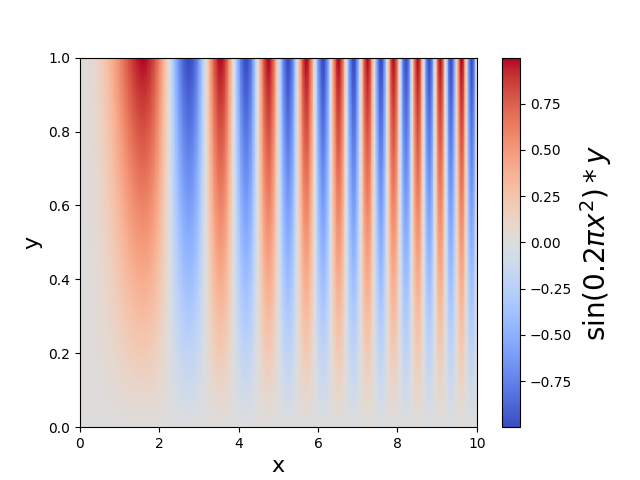

the shape of z is: (500, 500)


In [27]:
# Create some datapoints
x = np.linspace(0,10,num=500)
y = np.linspace(0,1,num=500)

#create a meshgrid (evenly spaced 2d array on each axis)
XX, YY = np.meshgrid(x, y)

## make ZZ a function of XX and YY
ZZ = np.sin(0.2*np.pi*XX**2) * YY

# Create figure and axes object
fig, ax = plt.subplots()

# Plot colormap and add colorbar scale 
image_plot = ax.imshow(ZZ,cmap='coolwarm', extent=[0,10,0,1],aspect="auto", interpolation='none',origin='lower') 
# image_plot = ax.matshow(ZZ,cmap='coolwarm',origin="lower") 

#make a colorbar
cbar = plt.colorbar(image_plot)
#set the colorbar's label properties, including an example of using LaTex code
cbar.set_label('$\sin(0.2 \pi x^2)*y$',fontsize=20,rotation=90)

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)

print('the shape of z is: '+str(np.shape(ZZ)))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.4:**
<ol>
<li>Try experimenting with some different colormaps. Here's a full list: http://matplotlib.org/examples/color/colormaps_reference.html
<li>Try reducing the number of points on the x and y axes by changing the 'num' argument in the linspace command. What happens for low values (<= 100 points)?
<li>Note that the imshow command turns on interpolation by default to reduce pixelation in images. When displaying quantitive data, this is generally not desireable. Here's a full list of interpolation methods: http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html. Try setting interpolation to 'none'
<li>Look up the documentation for 'matshow'. Try using it instead of 'imshow'.
<li>Notice the ```extent``` and ```aspect``` keywords in the ```imshow``` function. Try removing or editing them to see what happens
<li>Note that, in both imshow and matshow, the origin is in the upper left hand corner. Try using the following argument:
<p>&nbsp;&nbsp;&nbsp;&nbsp;```origin="lower"``` (but notice how this interacts with the ```extent``` keyword)

</ol>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Example 5 -  Error bars </h2>
<p>The ```errorbar``` function can be used to generate line plots with errorbars
</div>

<IPython.core.display.Javascript object>


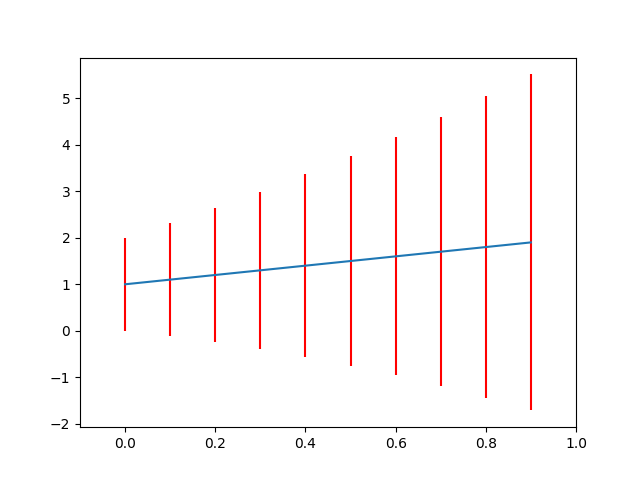

(-0.1, 1.0)

In [28]:
# Create some data
x = np.arange(0., 1., 0.1)
y = x + 1
y_error = y ** 2

# Create figure and axes object
fig, ax = plt.subplots()

# Create errorbar plot using `y_error` and color errorbars red
ax.errorbar(x, y, yerr=y_error, ecolor='red')
ax.set_xlim([-.1, 1.])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Example 6 -  Scatter Plots </h2>
<p> The ```scatterplot``` function allows you to generate scatter plots with dots of different sizes, colors, transparencies, etc.

</div>

<IPython.core.display.Javascript object>


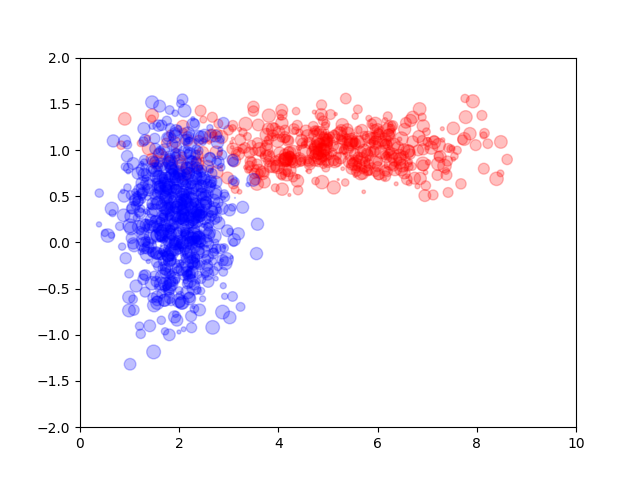

(-2, 2)

In [32]:
#make first dataset
n1 = 500
x1 = 5+1.5*np.random.randn(n1)
y1 = 1+0.2*np.random.randn(n1)
size1 = 100*np.random.rand(n1)

#make second dataset
n2 = 750
x2 = 2+0.5*np.random.randn(n2)
y2 = 0.25+0.5*np.random.randn(n2)
size2 = 100*np.random.rand(n2)

#make figure,axes handles
fig,ax=plt.subplots()

#plot scatter plots
ax.scatter(x1,y1,s=size1,color='red',alpha=0.25)
ax.scatter(x2,y2,s=size2,color='blue',alpha=0.25)

#set axis limits
ax.set_xlim(0,10)
ax.set_ylim(-2,2)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Example 7 - Gridspec </h2>

<p>Gridspec is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use **`ax.subplots()`** (like in the previous examples) if possible.  

<p>The documentation for gridspec is here: http://matplotlib.org/users/gridspec.html
</div>


<IPython.core.display.Javascript object>


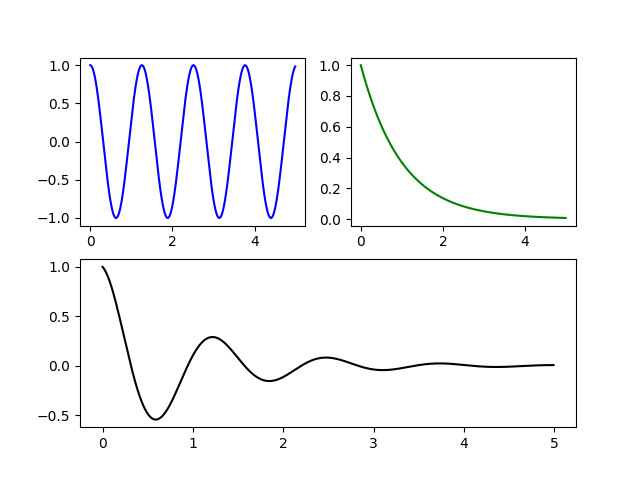

In [33]:
import matplotlib.gridspec as gridspec

t = np.arange(0., 5., 0.01)

fig=plt.figure()
# Create grispec object and define each subplot
gs = gridspec.GridSpec(2, 2)
ax0 = plt.subplot(gs[0, 0]) # Top left corner
ax1 = plt.subplot(gs[0, 1]) # Top right corner
ax2 = plt.subplot(gs[1, :]) # Bottom, span entire width

ax0.plot(t, np.cos(5 * t), c='b')
ax1.plot(t, np.exp(-1 * t), c='g')
ax2.plot(t, np.cos(5 * t) * np.exp(-1 * t), c='k')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5.5:**
<p>Modify the above plot in the following ways:
<ol>
<li>Add another plot on the right edge that spans the full vertical distance (can be a scatter plot, imshow, line plot, etc.)
<li>Change the size of the entire plot to 12 inches wide by 6 inches tall
<li>Add a title to each subplot, and the figure as a whole
<li>Label all axes
<li>Modify the x-labels on the lower-left plot such that there is a tick every 0.5 points (0, 0.5, 1, 1.5, etc).
<li>Add gridlines to the upper left plot
<li>Make the line in the lower left plot thicker (linewidth of 3) and dashed
<ol>
</div>

<IPython.core.display.Javascript object>


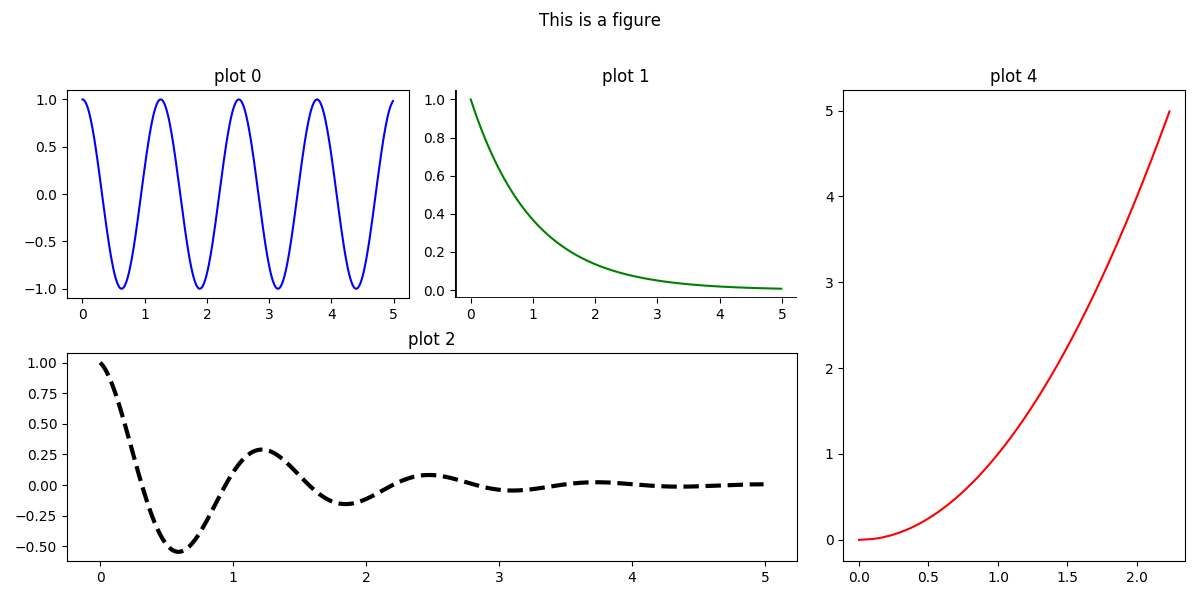

In [68]:
t = np.arange(0., 5., 0.01)

fig=plt.figure(figsize=(12,6))
# Create grispec object and define each subplot
gs = gridspec.GridSpec(2, 3)
ax0 = plt.subplot(gs[0, 0]) # Top left corner
ax1 = plt.subplot(gs[0, 1]) # Top right corner
ax2 = plt.subplot(gs[1, :-1]) # Bottom, span entire width
ax3 = plt.subplot(gs[:,2])

ax0.plot(t, np.cos(5 * t), c='b')
ax0.set_title('plot 0')
ax1.plot(t, np.exp(-1 * t), c='g')
ax1.set_title('plot 1')
ax1.set_frame_on(False)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
ax1.add_artist(plt.Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=2))
ax2.plot(t, np.cos(5 * t) * np.exp(-1 * t), c='k', linewidth = 3, linestyle='--')
ax2.set_title('plot 2')
ax3.plot(np.sqrt(t),t,c='r')
ax3.set_title('plot 4')

fig.suptitle('This is a figure')
fig.tight_layout()
plt.subplots_adjust(top=0.85)